### Importing all the libararies 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import robust_scale
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
import scipy.stats as stats
import statistics

df = pd.read_csv('CloudFactory_DataSet_Accuracy_Prediction.tsv', sep='\t')
df.head()

### Reading the Data 

In [2]:
df = pd.read_csv('CloudFactory_DataSet_Accuracy_Prediction.tsv', sep='\t')
df.head()

,timestamp,task_id,worker_id,keypress_keytypeint,mousemove_distance,mouseclick_button,work_duration,accuracy
0,1470267718900,57a28146e2013f2463dcd0b8,512dbf09c32206698e000518,4.0,NaN,NaN,23.884,1.0
1,1470267724803,57a28146e2013f2463dcd0b8,512dbf09c32206698e000518,6.0,NaN,NaN,23.884,1.0
2,1470267724823,57a28146e2013f2463dcd0b8,512dbf09c32206698e000518,6.0,NaN,NaN,23.884,1.0
3,1470267725117,57a28146e2013f2463dcd0b8,512dbf09c32206698e000518,12.0,NaN,NaN,23.884,1.0
4,1470267725276,57a28146e2013f2463dcd0b8,512dbf09c32206698e000518,12.0,NaN,NaN,23.884,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239464 entries, 0 to 239463
Data columns (total 8 columns):
timestamp              239464 non-null int64
task_id                239464 non-null object
worker_id              239464 non-null object
keypress_keytypeint    186671 non-null float64
mousemove_distance     24430 non-null float64
mouseclick_button      28608 non-null float64
work_duration          239464 non-null float64
accuracy               239464 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 14.6+ MB


### PDA - Seeing unique values

In [4]:
df['accuracy'].unique()

array([ 1.        ,  0.5       ,  0.        ,  0.83333333,  0.66666667,
        0.33333333,  0.16666667])

In [5]:
df['worker_id'].nunique()

93

In [6]:
df['task_id'].nunique()

5000

In [7]:
df['keypress_keytypeint'].nunique()

12

In [8]:
print ('Maximum value of Mousemove Distance in pixesls is',df['mousemove_distance'].max())
print ('-----')
print ('Minimum value of Mousemove Distance in pixesls is',df['mousemove_distance'].min())

Maximum value of Mousemove Distance in pixesls is 1337.70325558
-----
Minimum value of Mousemove Distance in pixesls is 0.0


In [9]:
print ('Maximum work duration', df['work_duration'].max())
print ('Minimum work duration', df['work_duration'].min())

Maximum work duration 413.602
Minimum work duration 1.986


In [55]:
df['mouseclick_button'].value_counts()

1.0    28608
Name: mouseclick_button, dtype: int64

### PDA - seeing accuracy vs work duration


In [47]:
df_accu = df[['task_id','work_duration','accuracy']]
df_accu = df_accu.groupby('task_id').mean()
df_accu.reset_index(level=0,inplace= True)
df_accu.head()

,task_id,work_duration,accuracy
0,57a280bc296d6d75f3d34350,16.770,1.0
1,57a280bc296d6d75f3d34351,32.118,1.0
2,57a28146e2013f2463dcd0b8,23.884,1.0
3,57a28146e2013f2463dcd0ba,12.470,1.0
4,57a28146e2013f2463dcd0bb,13.629,1.0


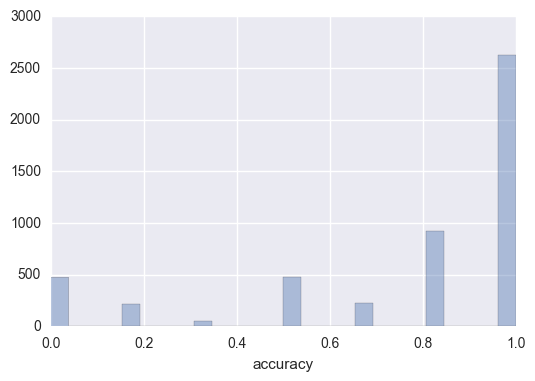

In [48]:
sns.distplot(df_accu['accuracy'], kde = False)

In [49]:
df_accu['accuracy'] = df_accu['accuracy'] * 6

In [50]:
df_accu['accuracy'].value_counts()

6.0    2626
3.0     476
0.0     475
5.0     250
5.0     103
5.0     100
1.0      96
4.0      86
5.0      85
5.0      83
5.0      56
5.0      54
5.0      53
5.0      53
5.0      37
4.0      28
5.0      28
1.0      26
4.0      18
4.0      17
4.0      15
1.0      15
4.0      14
1.0      14
1.0      13
1.0      13
5.0      13
1.0      12
4.0      11
2.0      11
       ... 
4.0       8
4.0       8
1.0       7
1.0       7
2.0       7
4.0       6
4.0       6
1.0       6
2.0       5
1.0       5
2.0       5
4.0       4
2.0       4
2.0       4
4.0       4
2.0       3
2.0       3
1.0       2
5.0       2
5.0       2
2.0       2
4.0       2
5.0       1
2.0       1
5.0       1
2.0       1
1.0       1
5.0       1
1.0       1
5.0       1
Name: accuracy, dtype: int64

In [51]:
df_accu['accuracy'] = df_accu['accuracy'].round()

In [52]:
df_accu['accuracy'].value_counts()

6.0    2626
5.0     923
3.0     476
0.0     475
4.0     227
1.0     218
2.0      55
Name: accuracy, dtype: int64

### Accuracy vs work duration

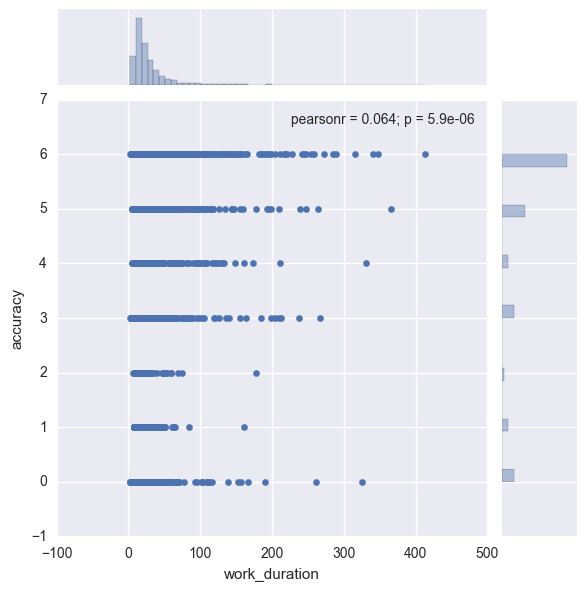

In [15]:
sns.jointplot(y = 'accuracy', x = 'work_duration', data = df_accu)

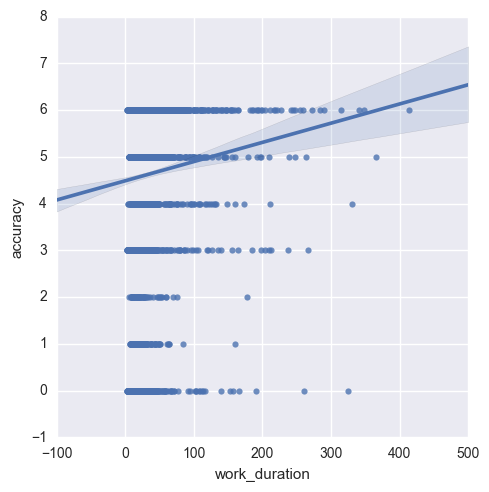

In [40]:
sns.lmplot(x='work_duration', y='accuracy',data=df_accu)

In [16]:
df_accu['accuracy'].corr(df_accu['work_duration'])

0.064000194239626454

> Since this data is inconclusive, let us try running linear regression

In [17]:
df_new = df.fillna(0, axis=1)
df_new['accuray'] = df_new['accuracy'] * 6 
df_new['accuracy'].value_counts()

1.000000    128845
0.833333     46514
0.000000     20263
0.500000     17222
0.666667     12565
0.166667     11509
0.333333      2546
Name: accuracy, dtype: int64

## Making a matrix with avg mousemove_distance, avg mousclick button and accuracy 

In [18]:
df_accu_LR = df_new[['task_id','work_duration','accuracy','mousemove_distance','mouseclick_button']]
df_accu_LR = df_accu_LR.groupby('task_id').mean()
df_accu_LR.reset_index(level=0,inplace= True)

In [19]:
df_accu_LR.head()

,task_id,work_duration,accuracy,mousemove_distance,mouseclick_button
0,57a280bc296d6d75f3d34350,16.770,1.0,2.817967,0.020408
1,57a280bc296d6d75f3d34351,32.118,1.0,1.357787,0.123077
2,57a28146e2013f2463dcd0b8,23.884,1.0,10.421885,0.035714
3,57a28146e2013f2463dcd0ba,12.470,1.0,0.000000,0.023256
4,57a28146e2013f2463dcd0bb,13.629,1.0,0.000000,0.000000


In [54]:
df_accu_LR['mouseclick_button'].value_counts()

0.000000    678
0.142857     49
0.125000     48
0.166667     47
0.062500     46
0.031250     41
0.111111     39
0.100000     39
0.083333     38
0.055556     37
0.076923     37
0.052632     36
0.035714     35
0.043478     35
0.058824     35
0.066667     35
0.050000     35
0.200000     34
0.038462     34
0.090909     33
0.032258     33
0.047619     32
0.028571     31
0.034483     31
0.071429     30
0.033333     28
0.041667     28
0.153846     27
0.285714     27
0.025641     26
           ... 
0.818182      1
0.279070      1
0.689655      1
0.159420      1
0.065934      1
0.473684      1
0.626016      1
0.280488      1
0.011905      1
0.397849      1
0.169643      1
0.258621      1
0.213333      1
0.515152      1
0.367347      1
0.356250      1
0.323944      1
0.237500      1
0.391892      1
0.833333      1
0.661017      1
0.382353      1
0.025862      1
0.072289      1
0.517647      1
0.350427      1
0.274510      1
0.623377      1
0.175439      1
0.368421      1
Name: mouseclick_button,

> In the above matrix that we can see, the mousemove_distance and mouseclick_button are average over the time period

> Let us try plotting avg mousemove distance per unit time vs accuracy

In [20]:
df_accu_LR['mousemove_distance'].corr(df_accu_LR['accuracy'])
df_accu_LR['mousemove_distance'].shape

(5000,)

> This data is not that significant. But still negative correlation gives us somewhat idea

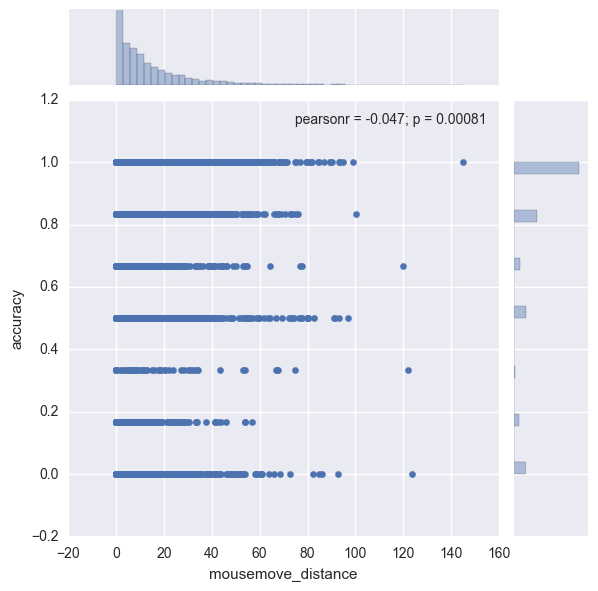

In [21]:
sns.jointplot(x='mousemove_distance', y='accuracy', data=df_accu_LR)

In [53]:
df_accu_LR['accuracy'].corr(df_accu_LR['work_duration'])

0.064000194239626496

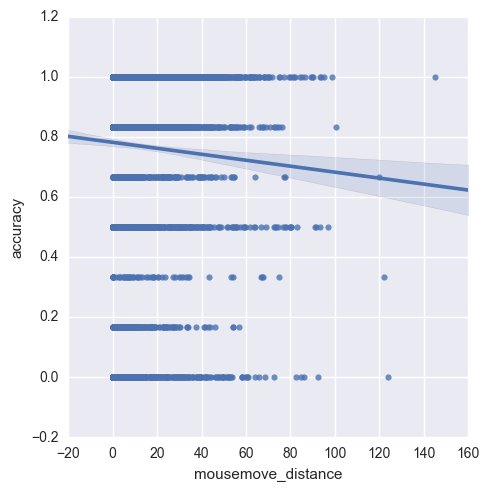

In [42]:
sns.lmplot(x='mousemove_distance', y='accuracy',data = df_accu_LR)

In [22]:
df_accu_LR.to_csv('Avg_mat.csv')

> Let us try similar thing for mouseclick button value and accuracy

In [23]:
df_accu_LR['mouseclick_button'].corr(df['accuracy'])

-0.070949998920810053

> Again, the negative correlation gives us somewhat idea that as mouseclick increases, accuracy decreses 

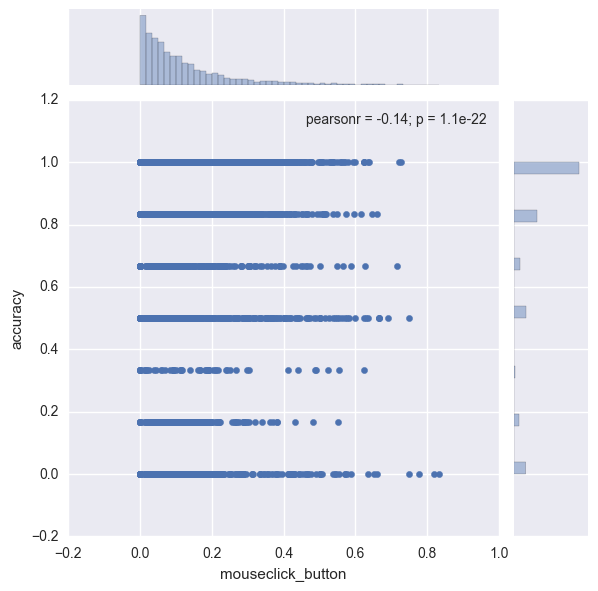

In [24]:
sns.jointplot(x = 'mouseclick_button', y = 'accuracy', data = df_accu_LR)

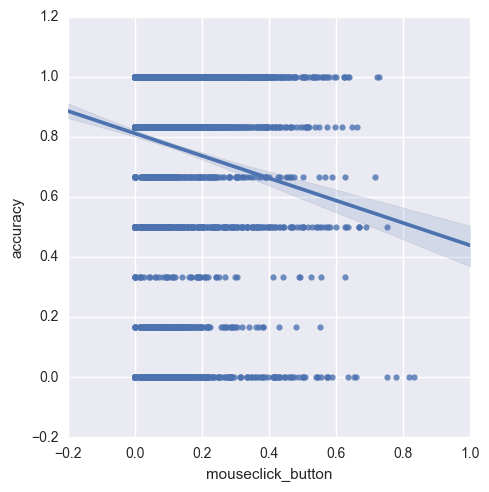

In [43]:
sns.lmplot(x='mouseclick_button', y='accuracy', data =df_accu_LR)

> Lets try linear regression on this new matrix. 

In [25]:
x = pd.DataFrame(df_accu_LR[['mousemove_distance','mouseclick_button','work_duration']])
y = pd.DataFrame(df_accu_LR['accuracy'])

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.4, random_state = 101)

In [27]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
coef = pd.DataFrame(lm.coef_ , columns = x_test.columns)
coef

,mousemove_distance,mouseclick_button,work_duration
0,-0.000433,-0.422308,0.000921


In [29]:
predictions = lm.predict(x_test)

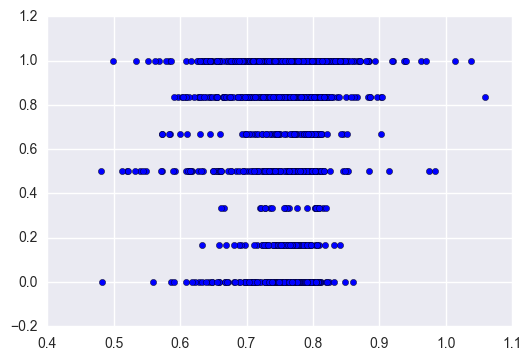

In [30]:
plt.scatter ( predictions, y_test)

In [31]:
predict_y = pd.DataFrame(predictions)

In [32]:
predict_y[0] = predict_y * 6
predict_y[0] = predict_y[0].round()

In [33]:
predict_y[0].value_counts()

5.0    1444
4.0     523
3.0      21
6.0      12
Name: 0, dtype: int64

In [34]:
y_test['accuracy'] = y_test['accuracy'] * 6

C:\Users\Chinmay\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [35]:
y_test['accuracy'] = y_test['accuracy'].round()

C:\Users\Chinmay\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [36]:
y_test['accuracy'].value_counts()

6.0    1036
5.0     402
0.0     193
3.0     178
4.0      85
1.0      83
2.0      23
Name: accuracy, dtype: int64

C:\Users\Chinmay\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


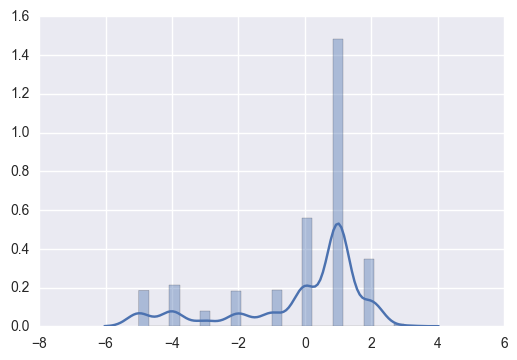

In [37]:
sns.distplot((y_test-predictions))

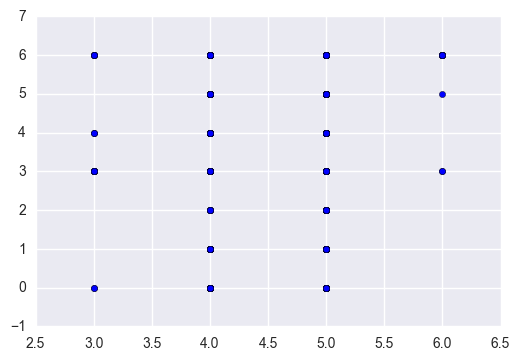

In [38]:
plt.scatter(predict_y[0],y_test['accuracy'])

   >Now, lets calculate correlation

In [39]:
y_test['accuracy'].corr(predict_y[0])

-0.0095305683693789056

> So the correlation is -0.0095. That does not tell us a lot ...!!!
>> Let us try something else